#Import Library

In [ ]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, accuracy_score
from sklearn.metrics import mean_gamma_deviance
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px

#Load Dataset

In [ ]:
df = pd.read_csv('BBCA.JK.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,4380.0,4380.0,4380.0,4380.0,3965.378174,0
1,2018-01-02,4380.0,4505.0,4365.0,4380.0,3965.378174,82303500
2,2018-01-03,4385.0,4390.0,4265.0,4380.0,3965.378174,68214000
3,2018-01-04,4380.0,4445.0,4380.0,4445.0,4024.225098,76567000
4,2018-01-05,4460.0,4480.0,4435.0,4450.0,4028.751709,65268000
...,...,...,...,...,...,...,...
1470,2023-11-27,8900.0,8950.0,8875.0,8875.0,8875.000000,35679000
1471,2023-11-28,8875.0,8950.0,8850.0,8875.0,8875.000000,69070600
1472,2023-11-29,8900.0,8950.0,8900.0,8900.0,8900.000000,54715600
1473,2023-11-30,8925.0,8975.0,8900.0,8975.0,8975.000000,205312100


- Date: This column usually contains a timestamp indicating when the data was measured or recorded. Each row in the data may have a different date, and this is typically an important independent variable for analyzing trends and making predictions.

- Open: The opening stock price at the beginning of a trading period, such as daily or weekly. It is the price at which the stock is first traded on that day.

- High: The highest price reached by the stock during a specific trading period. It reflects the highest price paid by buyers during that period.

- Low: The lowest price reached by the stock during a specific trading period. It reflects the lowest price accepted by sellers during that period.

- Close: The last stock price at the end of a trading period. It is the final traded price for that day.

- Adj Close (Adjusted Close): The closing price that has been adjusted to account for changes in the stock that may occur due to stock splits, dividends, or other company events.

- Volume: The number of shares traded during a specific period. It provides an indication of how liquid a stock is and can be used to identify trends or predict price movements.

In [ ]:
print("Total days in the dataset : ", df.shape[0])
print("Total columns in the dataset : ", df.shape[1])

Total days in the dataset :  1475
Total columns in the dataset :  7


In [ ]:
df.shape

(1475, 7)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,4380.0,4380.0,4380.0,4380.0,3965.378174,0
1,2018-01-02,4380.0,4505.0,4365.0,4380.0,3965.378174,82303500
2,2018-01-03,4385.0,4390.0,4265.0,4380.0,3965.378174,68214000
3,2018-01-04,4380.0,4445.0,4380.0,4445.0,4024.225098,76567000
4,2018-01-05,4460.0,4480.0,4435.0,4450.0,4028.751709,65268000


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1470,2023-11-27,8900.0,8950.0,8875.0,8875.0,8875.0,35679000
1471,2023-11-28,8875.0,8950.0,8850.0,8875.0,8875.0,69070600
1472,2023-11-29,8900.0,8950.0,8900.0,8900.0,8900.0,54715600
1473,2023-11-30,8925.0,8975.0,8900.0,8975.0,8975.0,205312100
1474,2023-12-01,8925.0,8975.0,8900.0,8950.0,8950.0,80566400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1475 non-null   object 
 1   Open       1475 non-null   float64
 2   High       1475 non-null   float64
 3   Low        1475 non-null   float64
 4   Close      1475 non-null   float64
 5   Adj Close  1475 non-null   float64
 6   Volume     1475 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 80.8+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1475.000000,1475.000000,1475.000000,1475.000000,1475.000000,1.475000e+03
mean,6640.244068,6699.030508,6579.515254,6639.386441,6330.747561,8.131979e+07
std,1448.396569,1456.374763,1444.198256,1449.974715,1571.717366,5.234395e+07
min,4190.000000,4210.000000,4120.000000,4120.000000,3758.401367,0.000000e+00
25%,5530.000000,5560.000000,5477.500000,5505.000000,5068.029785,5.317215e+07
50%,6390.000000,6435.000000,6330.000000,6385.000000,6039.387695,7.157250e+07
75%,7800.000000,7887.500000,7725.000000,7812.500000,7571.572754,9.686600e+07
max,9425.000000,9450.000000,9375.000000,9400.000000,9400.000000,7.228279e+08


#Checking Missing Values

In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
print("NA Values : ", df.isnull().values.any())

NA Values :  False


In [ ]:
df.shape

(1475, 7)

#Explory Data Analysis

In [ ]:
df.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
560,2020-02-28,6200.0,6290.0,6035.0,6290.0,5827.740723,169946500
1253,2022-12-30,8575.0,8650.0,8550.0,8550.0,8382.450195,44681400
695,2020-09-22,5520.0,5565.0,5430.0,5450.0,5136.765137,163442500
441,2019-09-10,6020.0,6055.0,5985.0,6055.0,5592.313965,40291000
1048,2022-03-02,8225.0,8225.0,7975.0,7975.0,7670.751953,100301000


In [ ]:
df.describe(include="all")

,Date,Open,High,Low,Close,Adj Close,Volume
count,1475,1475.000000,1475.000000,1475.000000,1475.000000,1475.000000,1.475000e+03
unique,1475,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,6640.244068,6699.030508,6579.515254,6639.386441,6330.747561,8.131979e+07
std,NaN,1448.396569,1456.374763,1444.198256,1449.974715,1571.717366,5.234395e+07
min,NaN,4190.000000,4210.000000,4120.000000,4120.000000,3758.401367,0.000000e+00
25%,NaN,5530.000000,5560.000000,5477.500000,5505.000000,5068.029785,5.317215e+07
50%,NaN,6390.000000,6435.000000,6330.000000,6385.000000,6039.387695,7.157250e+07
75%,NaN,7800.000000,7887.500000,7725.000000,7812.500000,7571.572754,9.686600e+07


In [ ]:
sd = df.iloc[0][0]
ed = df.iloc[-1][0]

print("Starting Date : ", sd)
print("Ending Date : ", ed)

Starting Date :  2018-01-01
Ending Date :  2023-12-01


##StockPrice Analysis from Start

###Analysis of year `2018`

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
y_2018 = df.loc[(df['Date'] >= '2018-01-01')
                & (df['Date'] < '2019-01-01')]

y_2018.drop(y_2018[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2018-01-01,4380.0,4380.0,4380.0,4380.0
1,2018-01-02,4380.0,4505.0,4365.0,4380.0
2,2018-01-03,4385.0,4390.0,4265.0,4380.0
3,2018-01-04,4380.0,4445.0,4380.0,4445.0
4,2018-01-05,4460.0,4480.0,4435.0,4450.0
...,...,...,...,...,...
256,2018-12-25,5170.0,5170.0,5170.0,5170.0
257,2018-12-26,5170.0,5225.0,5140.0,5225.0
258,2018-12-27,5240.0,5255.0,5180.0,5195.0
259,2018-12-28,5195.0,5240.0,5180.0,5200.0


In [ ]:
monthvise = y_2018.groupby(y_2018['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
              'September', 'October', 'November','December']
monthvise = monthvise.reindex(new_order, axis = 0)
monthvise

,Open,Close
Date,,
January,4488.043478,4488.478261
February,4740.750000,4740.500000
March,4661.590909,4654.545455
April,4607.142857,4598.571429
May,4462.173913,4480.000000
June,4435.238095,4421.666667
July,4495.681818,4511.818182
August,4792.608696,4805.434783
September,4845.500000,4842.250000


The average values of Open and Close each month in the year 2018

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x = monthvise.index,
    y = monthvise['Open'],
    name = 'BBCA Open Price',
    marker_color = 'crimson'
))
fig.add_trace(go.Bar(
    x = monthvise.index,
    y = monthvise['Close'],
    name = 'BBCA Close Price',
    marker_color = 'lightsalmon'
))

fig.update_layout(barmode = 'group', xaxis_tickangle = -45,
                  title = 'Monthwise beetwen BBCA Open and Close price')
fig.show()

In [ ]:
y_2018.groupby(y_2018['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2018.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis = 0)

monthvise_low =  y_2018.groupby(y_2018['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis = 0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x = monthvise_high.index,
    y = monthvise_high,
    name = 'BBCA high Price',
    marker_color = 'rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x = monthvise_low.index,
    y = monthvise_low,
    name = 'BBCA low Price',
    marker_color = 'rgb(255, 128, 0)'
))

fig.update_layout(barmode = 'group',
                  title = 'Monthwise beetwen BBCA High and Low price')
fig.show()

In [ ]:
names = cycle(['BBCA Open Price', 'BBCA Close Price', 'BBCA high Price', 'BBCA low Price'])

fig = px.line(y_2018, x=y_2018.Date,y=[y_2018['Open'],y_2018['Close'],
                                       y_2018['High'], y_2018['Low']],
              labels= {'Date': 'Date', 'value': 'BBCA value'})
fig.update_layout(title_text= 'BBCA Analysis Chart', font_size= 15, font_color= 'black', legend_title_text= 'BBCA Parameters')
fig.for_each_trace(lambda t: t.update(name= next(names)))
fig.update_xaxes(showgrid= False)
fig.update_yaxes(showgrid= False)

fig.show()

###Analysis of year `2019`

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
y_2019 = df.loc[(df['Date'] >= '2019-01-01')
                & (df['Date'] < '2020-01-01')]

y_2019.drop(y_2019[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
261,2019-01-01,5200.0,5200.0,5200.0,5200.0
262,2019-01-02,5200.0,5245.0,5200.0,5240.0
263,2019-01-03,5200.0,5220.0,5115.0,5180.0
264,2019-01-04,5175.0,5205.0,5125.0,5205.0
265,2019-01-07,5265.0,5325.0,5245.0,5245.0
...,...,...,...,...,...
514,2019-12-20,6680.0,6740.0,6610.0,6660.0
515,2019-12-23,6680.0,6730.0,6650.0,6660.0
516,2019-12-26,6660.0,6725.0,6660.0,6680.0
517,2019-12-27,6670.0,6700.0,6670.0,6695.0


In [ ]:
monthvise = y_2019.groupby(y_2019['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
              'September', 'October', 'November','December']
monthvise = monthvise.reindex(new_order, axis = 0)
monthvise

,Open,Close
Date,,
January,5347.173913,5363.695652
February,5503.750000,5490.750000
March,5507.619048,5494.047619
April,5564.090909,5562.272727
May,5593.478261,5590.869565
June,5874.000000,5867.250000
July,6095.217391,6103.043478
August,6023.409091,6019.318182
September,6030.238095,6027.619048


The average values of Open and Close each month in the year 2019

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x = monthvise.index,
    y = monthvise['Open'],
    name = 'BBCA Open Price',
    marker_color = 'crimson'
))
fig.add_trace(go.Bar(
    x = monthvise.index,
    y = monthvise['Close'],
    name = 'BBCA Close Price',
    marker_color = 'lightsalmon'
))

fig.update_layout(barmode = 'group', xaxis_tickangle = -45,
                  title = 'Monthwise beetwen BBCA Open and Close price')
fig.show()

In [ ]:
y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2019.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis = 0)

monthvise_low =  y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis = 0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x = monthvise_high.index,
    y = monthvise_high,
    name = 'BBCA high Price',
    marker_color = 'rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x = monthvise_low.index,
    y = monthvise_low,
    name = 'BBCA low Price',
    marker_color = 'rgb(255, 128, 0)'
))

fig.update_layout(barmode = 'group',
                  title = 'Monthwise beetwen BBCA High and Low price')
fig.show()

In [ ]:
names = cycle(['BBCA Open Price', 'BBCA Close Price', 'BBCA high Price', 'BBCA low Price'])

fig = px.line(y_2019, x=y_2019.Date,y=[y_2019['Open'],y_2019['Close'],
                                       y_2019['High'], y_2019['Low']],
              labels= {'Date': 'Date', 'value': 'BBCA value'})
fig.update_layout(title_text= 'BBCA Analysis Chart', font_size= 15, font_color= 'black', legend_title_text= 'BBCA Parameters')
fig.for_each_trace(lambda t: t.update(name= next(names)))
fig.update_xaxes(showgrid= False)
fig.update_yaxes(showgrid= False)

fig.show()

###Analysis of year `2020`

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
y_2020 = df.loc[(df['Date'] >= '2020-01-01')
                & (df['Date'] < '2021-01-01')]

y_2020.drop(y_2020[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
519,2020-01-02,6695.0,6780.0,6680.0,6690.0
520,2020-01-03,6750.0,6800.0,6725.0,6800.0
521,2020-01-06,6720.0,6750.0,6690.0,6735.0
522,2020-01-07,6735.0,6770.0,6730.0,6740.0
523,2020-01-08,6670.0,6745.0,6670.0,6680.0
...,...,...,...,...,...
756,2020-12-22,6740.0,6820.0,6710.0,6715.0
757,2020-12-23,6905.0,6905.0,6620.0,6725.0
758,2020-12-28,6790.0,6820.0,6660.0,6780.0
759,2020-12-29,6775.0,6810.0,6740.0,6765.0


In [ ]:
monthvise = y_2020.groupby(y_2020['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
              'September', 'October', 'November','December']
monthvise = monthvise.reindex(new_order, axis = 0)
monthvise

,Open,Close
Date,,
January,6800.681818,6776.136364
February,6641.500000,6624.000000
March,5560.714286,5521.904762
April,5342.619048,5318.095238
May,5072.812500,5066.562500
June,5672.380952,5678.809524
July,6076.590909,6103.181818
August,6296.944444,6295.833333
September,5923.409091,5887.045455


The average values of Open and Close each month in the year 2020

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x = monthvise.index,
    y = monthvise['Open'],
    name = 'BBCA Open Price',
    marker_color = 'crimson'
))
fig.add_trace(go.Bar(
    x = monthvise.index,
    y = monthvise['Close'],
    name = 'BBCA Close Price',
    marker_color = 'lightsalmon'
))

fig.update_layout(barmode = 'group', xaxis_tickangle = -45,
                  title = 'Monthwise beetwen BBCA Open and Close price')
fig.show()

In [ ]:
y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2020.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis = 0)

monthvise_low =  y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis = 0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x = monthvise_high.index,
    y = monthvise_high,
    name = 'BBCA high Price',
    marker_color = 'rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x = monthvise_low.index,
    y = monthvise_low,
    name = 'BBCA low Price',
    marker_color = 'rgb(255, 128, 0)'
))

fig.update_layout(barmode = 'group',
                  title = 'Monthwise beetwen BBCA High and Low price')
fig.show()

In [ ]:
names = cycle(['BBCA Open Price', 'BBCA Close Price', 'BBCA high Price', 'BBCA low Price'])

fig = px.line(y_2020, x=y_2020.Date,y=[y_2020['Open'],y_2020['Close'],
                                       y_2020['High'], y_2020['Low']],
              labels= {'Date': 'Date', 'value': 'BBCA value'})
fig.update_layout(title_text= 'BBCA Analysis Chart', font_size= 15, font_color= 'black', legend_title_text= 'BBCA Parameters')
fig.for_each_trace(lambda t: t.update(name= next(names)))
fig.update_xaxes(showgrid= False)
fig.update_yaxes(showgrid= False)

fig.show()

###Analysis of year `2021`

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
y_2021 = df.loc[(df['Date'] >= '2021-01-01')
                & (df['Date'] < '2022-01-01')]

y_2021.drop(y_2021[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
761,2021-01-04,6800.0,6855.0,6720.0,6835.0
762,2021-01-05,6860.0,7090.0,6850.0,7090.0
763,2021-01-06,7050.0,7075.0,6880.0,6945.0
764,2021-01-07,7000.0,7050.0,6910.0,6965.0
765,2021-01-08,7035.0,7080.0,6975.0,7050.0
...,...,...,...,...,...
1003,2021-12-24,7300.0,7350.0,7300.0,7300.0
1004,2021-12-27,7300.0,7350.0,7300.0,7350.0
1005,2021-12-28,7375.0,7400.0,7325.0,7350.0
1006,2021-12-29,7350.0,7375.0,7300.0,7300.0


In [ ]:
monthvise = y_2021.groupby(y_2021['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
              'September', 'October', 'November','December']
monthvise = monthvise.reindex(new_order, axis = 0)
monthvise

,Open,Close
Date,,
January,7044.500000,7012.750000
February,6885.263158,6835.263158
March,6693.863636,6641.818182
April,6267.857143,6245.476190
May,6400.882353,6387.058824
June,6373.571429,6356.666667
July,6074.285714,6048.809524
August,6377.000000,6404.500000
September,6542.272727,6566.818182


The average values of Open and Close each month in the year 2021

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x = monthvise.index,
    y = monthvise['Open'],
    name = 'BBCA Open Price',
    marker_color = 'crimson'
))
fig.add_trace(go.Bar(
    x = monthvise.index,
    y = monthvise['Close'],
    name = 'BBCA Close Price',
    marker_color = 'lightsalmon'
))

fig.update_layout(barmode = 'group', xaxis_tickangle = -45,
                  title = 'Monthwise beetwen BBCA Open and Close price')
fig.show()

In [ ]:
y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2021.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis = 0)

monthvise_low =  y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis = 0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x = monthvise_high.index,
    y = monthvise_high,
    name = 'BBCA high Price',
    marker_color = 'rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x = monthvise_low.index,
    y = monthvise_low,
    name = 'BBCA low Price',
    marker_color = 'rgb(255, 128, 0)'
))

fig.update_layout(barmode = 'group',
                  title = 'Monthwise beetwen BBCA High and Low price')
fig.show()

In [ ]:
names = cycle(['BBCA Open Price', 'BBCA Close Price', 'BBCA high Price', 'BBCA low Price'])

fig = px.line(y_2021, x=y_2021.Date,y=[y_2021['Open'],y_2021['Close'],
                                       y_2021['High'], y_2021['Low']],
              labels= {'Date': 'Date', 'value': 'BBCA value'})
fig.update_layout(title_text= 'BBCA Analysis Chart', font_size= 15, font_color= 'black', legend_title_text= 'BBCA Parameters')
fig.for_each_trace(lambda t: t.update(name= next(names)))
fig.update_xaxes(showgrid= False)
fig.update_yaxes(showgrid= False)

fig.show()

###Analysis of year `2022`italicized text

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
y_2022 = df.loc[(df['Date'] >= '2022-01-01')
                & (df['Date'] < '2023-01-01')]

y_2022.drop(y_2022[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1008,2022-01-03,7325.0,7400.0,7300.0,7325.0
1009,2022-01-04,7325.0,7450.0,7325.0,7400.0
1010,2022-01-05,7450.0,7525.0,7375.0,7450.0
1011,2022-01-06,7500.0,7525.0,7425.0,7475.0
1012,2022-01-07,7550.0,7700.0,7500.0,7650.0
...,...,...,...,...,...
1249,2022-12-26,8500.0,8625.0,8500.0,8575.0
1250,2022-12-27,8600.0,8650.0,8575.0,8600.0
1251,2022-12-28,8650.0,8650.0,8550.0,8650.0
1252,2022-12-29,8525.0,8600.0,8500.0,8575.0


In [ ]:
monthvise = y_2022.groupby(y_2022['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
              'September', 'October', 'November','December']
monthvise = monthvise.reindex(new_order, axis = 0)
monthvise

,Open,Close
Date,,
January,7652.380952,7673.809524
February,7848.611111,7868.055556
March,7942.045455,7932.954545
April,7857.894737,7859.210526
May,7460.000000,7480.000000
June,7451.190476,7454.761905
July,7225.000000,7214.285714
August,7875.000000,7919.318182
September,8367.045455,8414.772727


The average values of Open and Close each month in the year 2022

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x = monthvise.index,
    y = monthvise['Open'],
    name = 'BBCA Open Price',
    marker_color = 'crimson'
))
fig.add_trace(go.Bar(
    x = monthvise.index,
    y = monthvise['Close'],
    name = 'BBCA Close Price',
    marker_color = 'lightsalmon'
))

fig.update_layout(barmode = 'group', xaxis_tickangle = -45,
                  title = 'Monthwise beetwen BBCA Open and Close price')
fig.show()

In [ ]:
y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2022.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis = 0)

monthvise_low =  y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis = 0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x = monthvise_high.index,
    y = monthvise_high,
    name = 'BBCA high Price',
    marker_color = 'rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x = monthvise_low.index,
    y = monthvise_low,
    name = 'BBCA low Price',
    marker_color = 'rgb(255, 128, 0)'
))

fig.update_layout(barmode = 'group',
                  title = 'Monthwise beetwen BBCA High and Low price')
fig.show()

In [ ]:
names = cycle(['BBCA Open Price', 'BBCA Close Price', 'BBCA high Price', 'BBCA low Price'])

fig = px.line(y_2022, x=y_2022.Date,y=[y_2022['Open'],y_2022['Close'],
                                       y_2022['High'], y_2022['Low']],
              labels= {'Date': 'Date', 'value': 'BBCA value'})
fig.update_layout(title_text= 'BBCA Analysis Chart', font_size= 15, font_color= 'black', legend_title_text= 'BBCA Parameters')
fig.for_each_trace(lambda t: t.update(name= next(names)))
fig.update_xaxes(showgrid= False)
fig.update_yaxes(showgrid= False)

fig.show()

###Analysis of year `2023`

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
y_2023 = df.loc[(df['Date'] >= '2023-01-01')
                & (df['Date'] < '2024-01-01')]

y_2023.drop(y_2023[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1254,2023-01-02,8575.0,8600.0,8500.0,8550.0
1255,2023-01-03,8550.0,8600.0,8525.0,8550.0
1256,2023-01-04,8525.0,8575.0,8350.0,8350.0
1257,2023-01-05,8350.0,8375.0,8150.0,8250.0
1258,2023-01-06,8100.0,8325.0,8100.0,8300.0
...,...,...,...,...,...
1470,2023-11-27,8900.0,8950.0,8875.0,8875.0
1471,2023-11-28,8875.0,8950.0,8850.0,8875.0
1472,2023-11-29,8900.0,8950.0,8900.0,8900.0
1473,2023-11-30,8925.0,8975.0,8900.0,8975.0


In [ ]:
monthvise = y_2023.groupby(y_2023['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
              'September', 'October', 'November','December']
monthvise = monthvise.reindex(new_order, axis = 0)
monthvise

,Open,Close
Date,,
January,8338.095238,8340.476190
February,8742.500000,8747.500000
March,8569.047619,8546.428571
April,8923.214286,8932.142857
May,9010.714286,8976.190476
June,9088.235294,9097.058824
July,9151.250000,9127.500000
August,9252.272727,9257.954545
September,9080.000000,9080.000000


The average values of Open and Close each month in the year 2023




In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x = monthvise.index,
    y = monthvise['Open'],
    name = 'BBCA Open Price',
    marker_color = 'crimson'
))
fig.add_trace(go.Bar(
    x = monthvise.index,
    y = monthvise['Close'],
    name = 'BBCA Close Price',
    marker_color = 'lightsalmon'
))

fig.update_layout(barmode = 'group', xaxis_tickangle = -45,
                  title = 'Monthwise beetwen BBCA Open and Close price')
fig.show()

In [ ]:
y_2023.groupby(y_2023['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2023.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis = 0)

monthvise_low =  y_2023.groupby(y_2023['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis = 0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x = monthvise_high.index,
    y = monthvise_high,
    name = 'BBCA high Price',
    marker_color = 'rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x = monthvise_low.index,
    y = monthvise_low,
    name = 'BBCA low Price',
    marker_color = 'rgb(255, 128, 0)'
))

fig.update_layout(barmode = 'group',
                  title = 'Monthwise beetwen BBCA High and Low price')
fig.show()

In [ ]:
names = cycle(['BBCA Open Price', 'BBCA Close Price', 'BBCA high Price', 'BBCA low Price'])

fig = px.line(y_2023, x=y_2023.Date,y=[y_2023['Open'],y_2023['Close'],
                                       y_2023['High'], y_2023['Low']],
              labels= {'Date': 'Date', 'value': 'BBCA value'})
fig.update_layout(title_text= 'BBCA Analysis Chart', font_size= 15, font_color= 'black', legend_title_text= 'BBCA Parameters')
fig.for_each_trace(lambda t: t.update(name= next(names)))
fig.update_xaxes(showgrid= False)
fig.update_yaxes(showgrid= False)

fig.show()

###Analysis of year `overall`

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format= '%Y-%m-%d')

y_overall = df.loc[(df['Date'] >= '2018-01-01')
                    &(df['Date'] <= '2023-12-01')]
y_overall.drop(y_overall[['Adj Close', 'Volume']],axis= 1)

,Date,Open,High,Low,Close
0,2018-01-01,4380.0,4380.0,4380.0,4380.0
1,2018-01-02,4380.0,4505.0,4365.0,4380.0
2,2018-01-03,4385.0,4390.0,4265.0,4380.0
3,2018-01-04,4380.0,4445.0,4380.0,4445.0
4,2018-01-05,4460.0,4480.0,4435.0,4450.0
...,...,...,...,...,...
1470,2023-11-27,8900.0,8950.0,8875.0,8875.0
1471,2023-11-28,8875.0,8950.0,8850.0,8875.0
1472,2023-11-29,8900.0,8950.0,8900.0,8900.0
1473,2023-11-30,8925.0,8975.0,8900.0,8975.0


In [ ]:
monthvise = y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
              'September', 'October', 'November','December']
monthvise = monthvise.reindex(new_order, axis = 0)
monthvise

,Open,Close
Date,,
January,6557.807692,6555.615385
February,6706.538462,6697.008547
March,6487.829457,6463.992248
April,6247.500000,6238.559322
May,6281.608696,6278.043478
June,6401.322314,6397.892562
July,6473.565891,6472.674419
August,6775.039370,6789.488189
September,6798.937008,6804.212598


The average values of Open and Close each month in the year 2018 - 2023

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x = monthvise.index,
    y = monthvise['Open'],
    name = 'BBCA Open Price',
    marker_color = 'crimson'
))
fig.add_trace(go.Bar(
    x = monthvise.index,
    y = monthvise['Close'],
    name = 'BBCA Close Price',
    marker_color = 'lightsalmon'
))

fig.update_layout(barmode = 'group', xaxis_tickangle = -45,
                  title = 'Monthwise beetwen BBCA Open and Close price')
fig.show()

In [ ]:
y_overall.groupby(y_overall['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_overall.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis = 0)

monthvise_low =  y_overall.groupby(y_overall['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis = 0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x = monthvise_high.index,
    y = monthvise_high,
    name = 'BBCA high Price',
    marker_color = 'rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x = monthvise_low.index,
    y = monthvise_low,
    name = 'BBCA low Price',
    marker_color = 'rgb(255, 128, 0)'
))

fig.update_layout(barmode = 'group',
                  title = 'Monthwise beetwen BBCA High and Close price')
fig.show()

In [ ]:
names = cycle(['BBCA Open Price', 'BBCA Close Price', 'BBCA high Price', 'BBCA low Price'])

fig = px.line(y_overall, x=y_overall.Date,y=[y_overall['Open'],y_overall['Close'],
                                       y_overall['High'], y_overall['Low']],
              labels= {'Date': 'Date', 'value': 'BBCA value'})
fig.update_layout(title_text= 'BBCA Analysis Chart', font_size= 15, font_color= 'black', legend_title_text= 'BBCA Parameters')
fig.for_each_trace(lambda t: t.update(name= next(names)))
fig.update_xaxes(showgrid= False)
fig.update_yaxes(showgrid= False)

fig.show()

#Building `LSTM Model`

##First step is `Preparing Data for Training and Testing`

##As we want to predict `Close price` we are just considering `Close and Date`

In [ ]:
close_df = df[['Date', 'Close']]
print("Shape of close dataframe : ", close_df.shape)

Shape of close dataframe :  (1475, 2)


In [ ]:
fig = px.line(close_df, x= close_df.Date, y= close_df.Close, labels={'date' : 'Date', 'close' : 'Close Stock'})
fig.update_traces(marker_line_width= 2, opacity= 0.8, marker_line_color= 'orange')
fig.update_layout(title_text= 'Whole period of timeframe of BBCA close price 2018-2023', plot_bgcolor= 'white',
                  font_size= 15, font_color= 'black')
fig.update_xaxes(showgrid= False)
fig.update_yaxes(showgrid= False)
fig.show()

##Here we just considering `1 year data for training data`

In [ ]:
close_df= close_df[close_df['Date'] > '2022-12-01']
close_stock= close_df.copy()
print("Total data for prediction : ", close_stock.shape[0])

Total data for prediction :  242


In [ ]:
close_stock

,Date,Close
1233,2022-12-02,8900.0
1234,2022-12-05,8775.0
1235,2022-12-06,8675.0
1236,2022-12-07,8450.0
1237,2022-12-08,8500.0
...,...,...
1470,2023-11-27,8875.0
1471,2023-11-28,8875.0
1472,2023-11-29,8900.0
1473,2023-11-30,8975.0


In [ ]:
fig = px.line(close_df, x= close_df.Date, y= close_df.Close, labels={'date' : 'Date', 'close' : 'Close Stock'})
fig.update_traces(marker_line_width= 2, opacity= 0.8, marker_line_color= 'orange')
fig.update_layout(title_text= 'Whole period of timeframe of BBCA close price 2018-2023', plot_bgcolor= 'white',
                  font_size= 15, font_color= 'black')
fig.update_xaxes(showgrid= False)
fig.update_yaxes(showgrid= False)
fig.show()

##Normalizing Data

In [ ]:
del close_df['Date']
scaler= MinMaxScaler(feature_range= (0, 1))
close_df= scaler.fit_transform(np.array(close_df).reshape(-1,1))
print(close_df.shape)

(242, 1)


In [ ]:
close_df

array([[0.62962963],
       [0.53703704],
       [0.46296296],
       [0.2962963 ],
       [0.33333333],
       [0.38888889],
       [0.48148148],
       [0.48148148],
       [0.42592593],
       [0.33333333],
       [0.40740741],
       [0.44444444],
       [0.38888889],
       [0.46296296],
       [0.38888889],
       [0.33333333],
       [0.38888889],
       [0.40740741],
       [0.44444444],
       [0.38888889],
       [0.37037037],
       [0.37037037],
       [0.37037037],
       [0.22222222],
       [0.14814815],
       [0.18518519],
       [0.2962963 ],
       [0.09259259],
       [0.05555556],
       [0.09259259],
       [0.        ],
       [0.07407407],
       [0.2037037 ],
       [0.18518519],
       [0.2037037 ],
       [0.18518519],
       [0.12962963],
       [0.11111111],
       [0.31481481],
       [0.48148148],
       [0.48148148],
       [0.31481481],
       [0.33333333],
       [0.2962963 ],
       [0.48148148],
       [0.5       ],
       [0.59259259],
       [0.574

##Slicing data into `Training set` and `Testing set`

In [ ]:
train_size= int(len(close_df)*0.80)
test_size = len(close_df)-train_size
train_data, test_data= close_df[0:train_size,:],close_df[train_size:len(close_df),:1]
print("train data : ", train_data.shape)
print("test data : ", test_data.shape)

train data :  (193, 1)
test data :  (49, 1)


##Now we Transform the `Close` price based on `Time-Series-Analysis Forecasting` requirement, Here we will take 15

In [ ]:
def create_dataset(dataset, time_step= 1):
  dataX, dataY= [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i: (i+time_step),0] #i= 0, 0,1,2,3,...,100
    dataX.append(a)
    dataY.append(dataset[i+time_step, 0])
  return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 15
X_train, y_train= create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train : ", X_train.shape)
print("y_train : ", y_train.shape)
print("X_test : ", X_test.shape)
print("y_train : ", y_test.shape)

X_train :  (177, 15)
y_train :  (177,)
X_test :  (33, 15)
y_train :  (33,)


In [ ]:
#reshape input to be [samples, time_step, features] which is required for LSTM
X_train= X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test= X_test.reshape(X_test.shape[0],X_test.shape[1],1)

print("X_train : ", X_train.shape)
print("X_test : ", X_test.shape)

X_train :  (177, 15, 1)
X_test :  (33, 15, 1)


##Actual `Model Building`

In [ ]:
model= Sequential()
model.add(LSTM(10, input_shape=(None, 1), activation= "relu"))
model.add(Dense(1))
model.compile(loss= "mean_squared_error", optimizer= "adam")

In [ ]:
history= model.fit(X_train, y_train, validation_data= (X_test,y_test),epochs= 200, batch_size= 64, verbose= 1)

Epoch 1/200
3/3 [==============================] - 2s 206ms/step - loss: 0.2186 - val_loss: 0.1790
Epoch 2/200
3/3 [==============================] - 0s 31ms/step - loss: 0.1974 - val_loss: 0.1598
Epoch 3/200
3/3 [==============================] - 0s 32ms/step - loss: 0.1777 - val_loss: 0.1413
Epoch 4/200
3/3 [==============================] - 0s 31ms/step - loss: 0.1577 - val_loss: 0.1236
Epoch 5/200
3/3 [==============================] - 0s 33ms/step - loss: 0.1388 - val_loss: 0.1067
Epoch 6/200
3/3 [==============================] - 0s 31ms/step - loss: 0.1202 - val_loss: 0.0906
Epoch 7/200
3/3 [==============================] - 0s 39ms/step - loss: 0.1028 - val_loss: 0.0754
Epoch 8/200
3/3 [==============================] - 0s 34ms/step - loss: 0.0861 - val_loss: 0.0611
Epoch 9/200
3/3 [==============================] - 0s 30ms/step - loss: 0.0707 - val_loss: 0.0479
Epoch 10/200
3/3 [==============================] - 0s 42ms/step - loss: 0.0560 - val_loss: 0.0362
Epoch 11/200
3/3 [

#Plotting Loss vs Validation Loss

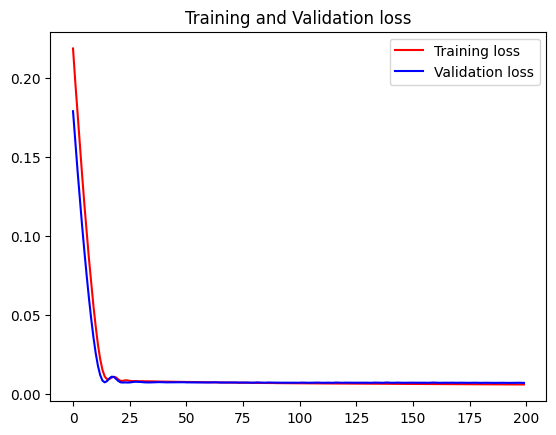

<Figure size 640x480 with 0 Axes>

In [ ]:
loss = history.history['loss']
val_loss= history.history['val_loss']

epochs= range(len(loss))

plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation loss')
plt.title('Training and Validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
#lets do the prediction and check performance metrics
train_predict= model.predict(X_train)
test_predict= model.predict(X_test)
train_predict.shape, test_predict.shape

2/2 [==============================] - 0s 6ms/step


((177, 1), (33, 1))

#`Model Evaluation`

In [ ]:
#transform back to original form
train_predict= scaler.inverse_transform(train_predict)
test_predict= scaler.inverse_transform(test_predict)
original_ytrain= scaler.inverse_transform(y_train.reshape(-1, 1))
original_ytest= scaler.inverse_transform(y_test.reshape(-1, 1))

#Evaluation metrics `RMSE, MSE, and MAE`

In [ ]:
#evaluation metrices RMSE and MAE
print("Train data RMSE : ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE : ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE : ", mean_absolute_error(original_ytrain, train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE : ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE : ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE : ", mean_absolute_error(original_ytest, test_predict))

Train data RMSE :  105.44306949995878
Train data MSE :  11118.240905573139
Train data MAE :  80.60221905896893
-------------------------------------------------------------------------------------
Test data RMSE :  113.93817338392725
Test data MSE :  12981.907354065866
Test data MAE :  95.04225852272727


In [ ]:
print("Train data explained variance regression score : ",
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score : ",
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score :  0.8925956949784148
Test data explained variance regression score :  -0.07728733658544806


#`R square` score for regression

In [ ]:
print("Train data R2 score: ", r2_score(original_ytrain, train_predict))
print("Test data R2 score: ", r2_score(original_ytest, test_predict))

Train data R2 score:  0.8924371799215024
Test data R2 score:  -0.07743523738803293


In [ ]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0001467613917835845
Test data MGD:  0.0001646225543893524
----------------------------------------------------------------------
Train data MPD:  1.2765930774839123
Test data MPD:  1.4618111723602025


In [ ]:
#shift train predictions for plotting

look_back= time_step
trainPredictPlot= np.empty_like(close_df)
trainPredictPlot[:, :]= np.nan
trainPredictPlot[look_back: len(train_predict)+look_back, :]= train_predict
print("Train predicted data: ", trainPredictPlot.shape)

#shift test predictions for plotting
testPredictPlot= np.empty_like(close_df)
testPredictPlot[:, 0]= np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1: len(close_df)-1, :]= test_predict
print("Test predicted data: ", testPredictPlot.shape)

names= cycle(['Original Close Price', 'Train Predicted Close Price', 'Test Predict Close Price'])

plot_df= pd.DataFrame({'date': close_stock['Date'],
                      'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1, -1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1, -1)[0].tolist()})

fig= px.line(plot_df, x=plot_df['date'], y= [plot_df['original_close'],plot_df['train_predicted_close'],
                                             plot_df['test_predicted_close']],
             labels= {'value': 'BBCA Price', 'date': 'Date'})
fig.update_layout(title_text= 'Comparision between BBCA original close price vs BBCA predicted close price',
                  plot_bgcolor= 'white', font_size= 15, font_color= 'black', legend_title_text= 'Close Price')
fig.for_each_trace(lambda t: t.update(name= next(names)))

fig.update_xaxes(showgrid= False)
fig.update_yaxes(showgrid= False)
fig.show()

Train predicted data:  (242, 1)
Test predicted data:  (242, 1)


#`Predicting` next 30 days

In [ ]:
x_input= test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input= list(x_input)
temp_input= temp_input[0].tolist()

from numpy import array

lst_output= []
n_step= time_step
i= 0
pred_days= 30
while(i< pred_days):
  if(len(temp_input)> time_step):
    x_input= np.array(temp_input[1:])
     #print("{} day input {}".format(i,x_input))
    x_input = x_input.reshape(1,-1)
    x_input = x_input.reshape((1, n_step, 1))

    yhat = model.predict(x_input, verbose=0)
    #print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    #print(temp_input)

    lst_output.extend(yhat.tolist())
    i=i+1

  else:

    x_input = x_input.reshape((1, n_step,1))
    yhat = model.predict(x_input, verbose=0)
    temp_input.extend(yhat[0].tolist())

    lst_output.extend(yhat.tolist())
    i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


#`Plotting last 15 days` of dataset and next `predicted 30 days`

In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(close_df[len(close_df)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

#`Plotting` entire `Closing Stock Price with next 30 days period of prediction`

In [ ]:
lstm_df=close_df.tolist()
lstm_df.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstm_df=scaler.inverse_transform(lstm_df).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstm_df,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()